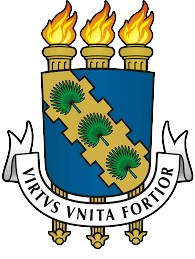
# Universidade Federal do Ceará  
## Departamento de Computação  

---

### Disciplina: **Métodos Numéricos**  
**Professor:** João Paulo do Vale Madeiro  

---

### **Aluno:** Lucas de Oliveira Sobral  
**Matrícula:** 556944  
**Curso:** Engenharia de Computação  


# Aula Prática 04 – Raízes de Equações (Métodos de Newton e da Secante)

##Questão 1

Encontre a raiz positiva da função 𝒇(𝒙) = 𝒄𝒐𝒔(𝒙) − 𝒙
𝟐 pelo método de Newton
inicializando-o com 𝒙
(𝟎) = 𝟏. Realize a iteração até obter estabilidade no quinto
dígito significativo

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def f(x):
  return np.cos(x) - x**2

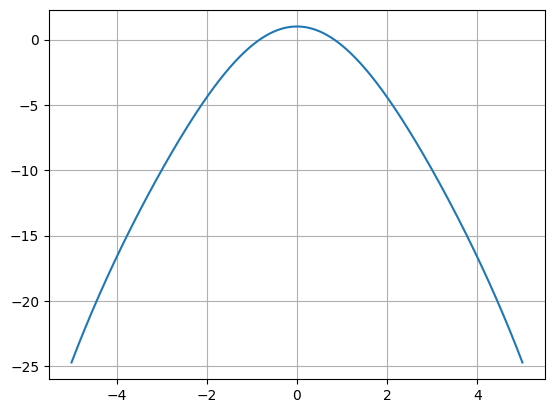

In [ ]:
xx=np.linspace(-5,5,1000)
yy=[]
for x in xx:
  yy.append(f(x))
plt.plot(xx,yy)
plt.grid()

In [ ]:
def fxl(x):
  return (-1)*np.sin(x) - 2*x

In [26]:
def met_newton(f,df,x0,tol,nalg,maxiter):
  x = x0 - f(x0)/df(x0)
  iter = 1
  erro = np.abs(x-x0)/np.abs(x)
  if nalg == 0:
    while erro > tol and iter < maxiter:
      x0 = x
      x = x0 - f(x0)/df(x0)
      iter += 1
      erro = np.abs(x-x0)/np.abs(x)
    return x, erro ,iter
  else:
    while np.abs(x-x0) > 10**(-nalg-1) and iter < maxiter:
      x0 = x
      x = x0 - f(x0)/df(x0)
      print(x)
      iter += 1
    erro = np.abs(x-x0)/np.abs(x)
    return x, erro ,iter

In [ ]:
[xr , erro, niter]  = met_newton(f,fxl,1,1e-5, 5,1000) # Essa aq é a q vale de verdade
print (xr, erro, niter)

0.8242418682258743
0.8241323190509289
0.8241323123025225
0.8241323123025225 8.188498725892985e-09 4


In [21]:
import math
import numpy as np

def iteracao(f,df, x):
    return x - (f(x)/(df(x)))

def Newton_Raphson(x0, f, df ,Tol, maxIter):
    iter = 1

    x_atual = iteracao(f, df, x0)

    erro = np.abs((x_atual - x0) / x_atual)

    while (erro > Tol and iter < maxIter):
        x_anterior = x_atual
        x_atual = iteracao(f, df, x_anterior)

        erro = np.abs((x_atual - x_anterior) / x_atual)
        iter += 1

    return x_atual, erro, iter


In [ ]:
x_aproximado, x_erro, x_iter = Newton_Raphson(1, f, fxl, 1e-5, 100)
print(x_aproximado, x_erro, x_iter)

0.8241323123025225 8.188498725892986e-07 4


## Questão 2

### Considere o problema de calcular as soluções positivas da equação: 𝒕𝒈(𝒙) = 𝟐𝒙 𝟐 .

### a) Use um método de busca intervalar para isolar as duas primeiras raízes positivas em pequenos intervalos;

In [3]:
def f(x):
  return np.tan(x) - 2*x**2

In [4]:
def fxl(x):
  return (1/np.cos(x))**2 - 4*x

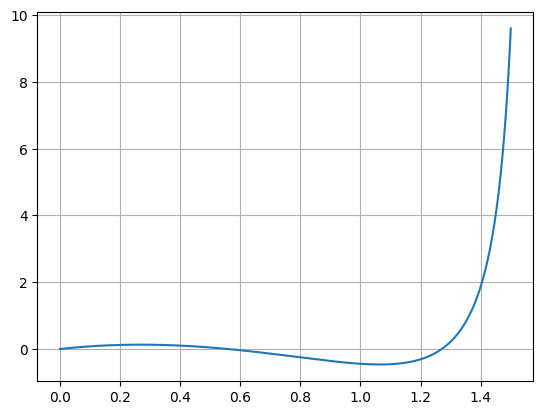

In [ ]:
xx=np.linspace(0,1.5,1000)
yy=[]
for x in xx:
  yy.append(f(x))
plt.plot(xx,yy)
plt.grid()

In [2]:
def buscaint(a,h,xmax,f):
  b = a+h
  while b<xmax:
    if f(a)*f(b) < 0:
      return a,b
    a = b
    b = a+h

In [ ]:
#Primeira raiz
 [a,b] = buscaint(0,1e-3,3,f)
print(a,b)

0.5590000000000004 0.5600000000000004


In [7]:
#Segunda raiz
[a,b] = buscaint(0.6,1e-3,3,f)
print(a,b)

1.2699999999999705 1.2709999999999704


### b) Calcule cada uma das raízes pelo método de Newton com oito dígitos significativos e discuta a convergência.

In [27]:
[xr , erro, niter]  = met_newton(f,fxl,0.559,1e-5, 8,1000)
print (xr, erro, niter)

0.5597041522736658
0.5597041522730807
0.5597041522730807 1.0453514264657307e-12 3


In [30]:
[xr , erro, niter]  = met_newton(f,fxl,1.269,1e-5, 8,1000)
print (xr, erro, niter)

1.2703426483461702
1.2703426477995827
1.2703426477995827 4.302677257359499e-10 3


Resposta: A utilização dos intervalos obtidos no último item ajudaram a conversão ser muito mais rápida

## Questão 3

Aplique o método de Newton à função $𝒇(𝒙) = 𝒙^n - A$ e construa um esquema
computacional para calcular $\sqrt[n]{A}$
para A > 0 com base em operações de multiplicação
e soma/subtração.

F(x) aplicado ao método de newton-raphson:

$x_{k+1} = x_{k} - \frac{x_k^n - A}{nx_k^{n-1}} = x_{k} - (x_k^n - A) \cdot (nx_k^{n-1})^{-1} $

In [31]:
def inversa_newton(n, a, tolerancia_percent, maxIter):
  iter = 1
 # print(f"Iteração {iter}: ")
  if n < 6:
    x0 = 1e-6
  else:
    x0 = 1e-10
  xk = x0*(2 - (a * x0))
  erro = np.abs((xk - x0) / xk) * 100
 # print(f"xR_{iter}: {xk}, Erro relativo percentual: {erro}%")
  while erro > tolerancia_percent and iter < maxIter:
    iter += 1
    #print(f"Iteração {iter}: ")
    x_ant = xk
    xk = x_ant*(2 - (a * x_ant))
    erro = np.abs((xk - x_ant) / xk) * 100
   # print(f"xR_{iter}: {xk}, Erro relativo percentual: {erro}%")

  return xk

In [32]:
def enesima_raiz(n, A):
  iter = 1
 # print(f"Iteração {iter}: ")
  x0 = 1
  tolerancia_percent = 1e-8
  maxIter = 25
  inversa = inversa_newton(n, (n*(x0**(n-1))), tolerancia_percent, maxIter)
  #print(f"Número: {n*(x0**(n-1))}, Inversa: {inversa}")
  xk = x0 - ((x0**n - A) * inversa)
  erro = np.abs((xk - x0) / xk) * 100
 # print(f"xR_{iter}: {xk}, Erro relativo percentual: {erro}%")
  while erro > tolerancia_percent and iter < maxIter:
    x_ant = xk
    iter += 1
    #print(f"Iteração {iter}: ")
    inversa = inversa_newton(n, (n*(x_ant**(n-1))), tolerancia_percent, maxIter)
    #print(f"Número: {n*(x_ant**(n-1))}, Inversa: {inversa}")
    xk = x_ant - ((x_ant**n - A) * inversa)
    erro = np.abs((xk - x_ant) / xk) * 100
    #print(f"xR_{iter}: {xk}, Erro relativo percentual: {erro}%")

  return xk

In [33]:
quadrados = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 36, 49, 64, 81, 100, 121]
cubos = [1, 3, 8, 15, 27]
numeros = [1, 50, 100, 1024]

for i in range(0, len(quadrados)):
  raiz = enesima_raiz(2, quadrados[i])
  print(f"Raíz quadrada de {quadrados[i]}: {raiz}")

print("")
for i in range(0, len(cubos)):
  raiz = enesima_raiz(3, cubos[i])
  print(f"Raíz cúbica de {cubos[i]}: {raiz}")

print("")
for i in range(0, len(numeros)):
  raiz = enesima_raiz(6, numeros[i])
  print(f"Raíz quinta de {numeros[i]}: {raiz}")

Raíz quadrada de 1: 1.0
Raíz quadrada de 2: 1.4142135623730951
Raíz quadrada de 3: 1.7320508075688774
Raíz quadrada de 4: 2.0
Raíz quadrada de 5: 2.23606797749979
Raíz quadrada de 6: 2.449489742783178
Raíz quadrada de 7: 2.6457513110645907
Raíz quadrada de 8: 2.82842712474619
Raíz quadrada de 9: 3.0
Raíz quadrada de 10: 3.162277660168379
Raíz quadrada de 25: 5.0
Raíz quadrada de 36: 6.0
Raíz quadrada de 49: 7.0
Raíz quadrada de 64: 8.0
Raíz quadrada de 81: 9.0
Raíz quadrada de 100: 10.0
Raíz quadrada de 121: 11.0

Raíz cúbica de 1: 1.0
Raíz cúbica de 3: 1.4422495703074083
Raíz cúbica de 8: 2.0
Raíz cúbica de 15: 2.4662120743304703
Raíz cúbica de 27: 3.0

Raíz quinta de 1: 1.0
Raíz quinta de 50: 1.9193746366740232
Raíz quinta de 100: 2.1544346896105973
Raíz quinta de 1024: 3.1748021039364023


## Questão 4

Encontre as raízes do polinômio 𝒇(𝒙) = 𝒙
𝟒 − 𝟒𝒙
𝟐 + 𝟒 através do Método das
Secantes. O que você observa em relação ao erro obtido ?

In [ ]:
def f(x):
  return x**4 - 4*x**2 + 4

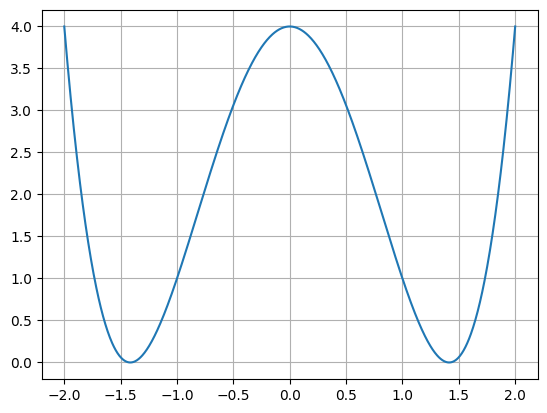

In [ ]:
xx=np.linspace(-2,2,1000)
yy=[]
for x in xx:
  yy.append(f(x))
plt.plot(xx,yy)
plt.grid()

In [ ]:
import math
import numpy as np


def iteracao(f, x0, x1):
    return ((x0*f(x1) - x1*f(x0))/(f(x1) - f(x0)))

def Secante(x0, x1, f ,Tol, maxIter):

    iter = 1
    x_anterior = x0
    x_atual = x1
    x_proximo = iteracao(f,x0,x1)

    erro = np.abs((x_proximo - x_atual)/x_proximo) * 100

    while (erro > Tol and iter < maxIter):
        x_anterior = x_atual
        x_atual = x_proximo
        x_proximo = iteracao(f,x_anterior, x_atual)


        erro = np.abs((x_proximo - x_atual)/x_proximo) * 100
        iter += 1

    return x_proximo, erro, iter


In [ ]:
def met_secante(f,x0,x00,tol,nalg,maxiter):
  x = x0 - f(x0)/((f(x0)-f(x00))/(x0-x00))
  print(x)
  iter = 1
  erro = np.abs(x-x0)/np.abs(x)
  if nalg == 0:
    while erro > tol and iter < maxiter:
      x00 = x0
      x0 = x
      x = x0 - f(x0)/((f(x0)-f(x00))/(x0-x00))
      iter += 1
      erro = np.abs(x-x0)/np.abs(x)
    return x, erro ,iter
  else:
    while np.abs(x-x0) > 10**(-nalg-1) and iter < maxiter:
      x00 = x0
      x0 = x
      x = x0 - f(x0)/((f(x0)-f(x00))/(x0-x00))
      print(x)
      iter += 1
    erro = np.abs(x-x0)/np.abs(x)
    return x, erro ,iter

In [ ]:
[xr , erro, niter]  = met_secante(f, 1.5, 1.6, 1e-5, 8, 1000)
print (xr, erro, niter)

1.4751095181202707
1.4506803047544297
1.4373770876729357
1.4285180480540165
1.4231114571898282
1.4197202987546926
1.4176232714592234
1.4163225011339564
1.4155177731213415
1.4150198751215144
1.4147120036264087
1.4145216564902883
1.4144039910795163
1.4143312597843958
1.414286305699062
1.4142585211011203
1.414241348733872
1.414230735415641
1.4142241759469347
1.414220121942233
1.414217616427584
1.4142160679091742
1.4142151109023544
1.4142145193902553
1.4142141538933786
1.41421392786902
1.414213788357833
1.4142137019848235
1.4142136489487651
1.4142136152436064
1.4142135943785081
1.4142135833322795
1.4142135744952966
1.4142135656583137
1.4142135568213308
1.4142135568213308
1.4142135568213308 0.0 36


In [ ]:
f(xr)

0.0

In [ ]:
x_aproximado, x_erro, x_iter = Secante(1.5, 1.6, f, 1e-8, 100)
print(x_aproximado, x_erro, x_iter)

1.4142135656784052 0.0 36


Resposta: Que o erro diminui muito rapidamente e acaba por zerar

## Questão 5

Encontre as raízes reais do polinômio 𝒇(𝒙) = $\frac{x^5}{100} + x^4 + 3x + 1$ isolando-as por
um método a sua escolha e depois usando o Método das Secantes. Expresse a solução
com 7 dígitos significativos.

In [ ]:
def f(x):
 return ((x**5) / 100) + x**4 + (3 * x) + 1

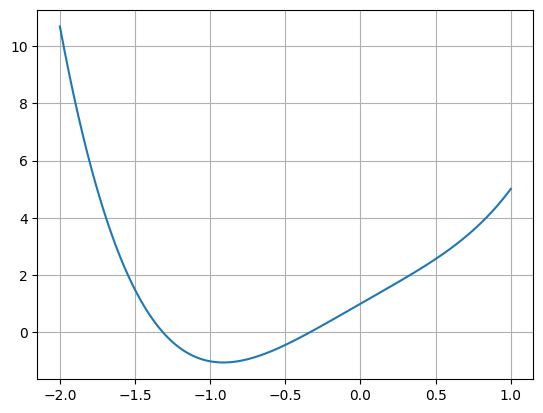

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2,1,1000)
y=[]
for i in x:
    y.append(f(i))
plt.grid()
plt.plot(x,y)

In [ ]:
x_aproximado, x_erro, x_interacoes = Secante(-2, -1, f, 1e-7, 100)
print(x_aproximado, x_erro, x_interacoes)

-1.3140064715219097 2.3216558618099152e-10 10


In [ ]:
x_aproximado, x_erro, x_interacoes = Secante(-1, 1, f, 1e-7, 100)
print(x_aproximado, x_erro, x_interacoes)

-0.33765134486986836 8.994899709707679e-08 7


In [ ]:
#Primeira raiz aplicada à solução
print(f(-1.314006))
#Segunda raiz aplicada à solução
print(f(-0.3376513))

-2.7942663081148567e-06
1.277296864943267e-07


Resposta: Observamos atraves do grafico 2 raizes do lado negativo e com isso conseguimos estimar os intervalos de cada um


primeira raiz: -1.3140064


segunda raiz: -0.3376513

## Questão 6:

Resolva numericamente a inequação:

$e^{−𝒙^𝟐} < 𝟐x$

In [ ]:
def f(x):
  return np.exp(-(x**2)) - (2 * x)

def df(x):
  return ((-2 * x) * np.exp(-(x**2))) - 2

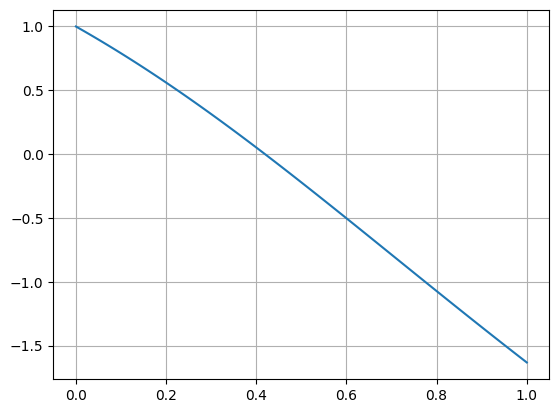

In [ ]:
x = np.linspace(0,1,100)
y = f(x)

plt.grid()
plt.plot(x,y)

In [ ]:
x_aproximado, x_erro, x_iteracoes = Newton_Raphson(0.5, f,df,0.0001,100)
print(x_aproximado, x_erro, x_iteracoes)

0.4193648240191416 5.1011336860311275e-05 3


In [ ]:
x_aproximado, x_erro, x_iteracoes = Secante(0.2, 0.5, f,0.0001,100)
print(x_aproximado, x_erro, x_iteracoes)

0.4193648240184804 1.2551700524086202e-05 4


Resposta: para todo x >= 0.4193648240 é solucão da inequação